# Basic of Quantum Information with Qiskit

https://learning.quantum.ibm.com/course/basics-of-quantum-information/exam

In [74]:
from qiskit.quantum_info import Statevector, DensityMatrix, Operator, entropy
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag, dag_to_circuit
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from fractions import Fraction

In [75]:
## Check if matrices are stochastic 

In [76]:
matrices = []
matrices.append(np.array([[1,0,0],
                          [0,1,0],
                          [0,0,-1]])
           )

matrices.append(np.array([[1/3.,1/3.,1/3.],
                          [1/4.,5/12.,1/3.],
                          [5/12.,1/3.,1/4.]])
           )

matrices.append(np.array([[0,1,0],
                          [0,0,1],
                          [1,0,0]]))

def is_stochastic(mat: np.array) -> bool:
    """ Check if a matrix is stochastic """
    if np.all(mat >= 0) and np.all(np.sum(mat, axis=0) == np.ones(mat.shape[0])):
        return True
    else:
        return False
    
[is_stochastic(mat) for mat in matrices]



[False, False, True]

In [77]:
array_to_latex(matrices[0])

<IPython.core.display.Latex object>

## Cartesian product form classical states

In [78]:
gamma = ["♣︎", "♦︎", "♥︎", "♠︎"]
gamma_prod = list(product(gamma, gamma))
gamma_prod

[('♣︎', '♣︎'),
 ('♣︎', '♦︎'),
 ('♣︎', '♥︎'),
 ('♣︎', '♠︎'),
 ('♦︎', '♣︎'),
 ('♦︎', '♦︎'),
 ('♦︎', '♥︎'),
 ('♦︎', '♠︎'),
 ('♥︎', '♣︎'),
 ('♥︎', '♦︎'),
 ('♥︎', '♥︎'),
 ('♥︎', '♠︎'),
 ('♠︎', '♣︎'),
 ('♠︎', '♦︎'),
 ('♠︎', '♥︎'),
 ('♠︎', '♠︎')]

## Computing tensor product

In [79]:
u = Statevector([-2, 1], dims=2)
v = Statevector([1, 0, 1], dims=3)
w = Statevector([4, 1], dims=2)
x = Statevector([1/2, 1/2, 1/2], dims=3)

psi = u.tensor(v)-(2/3)*w.tensor(x)
psi.draw('latex')

<IPython.core.display.Latex object>

## Compute partial standard basis measurement outcome


In [80]:
psi0 = (1/np.sqrt(3))*(
    Statevector.from_label("0+-")+
    Statevector.from_label("100")-
    Statevector.from_label("111")
)
psi0.draw('latex')

<IPython.core.display.Latex object>

In [81]:
# build the projector on state 0
P0 = Statevector.from_label("0")
Unit = Operator(np.eye(2))
Pr0 = Unit.tensor(P0.to_operator()).tensor(Unit)

# State after the measurement
psif = psi0.evolve(Pr0)
p0 = np.sqrt(np.real(psif.inner(psif)))
psifn = psif.copy() / np.sqrt(np.real(psif.inner(psif)))

print(f"Probabiliy to get 0: {np.round(p0**2, 2)}")
psifn.draw('latex')

Probabiliy to get 0: 0.5


<IPython.core.display.Latex object>

## Recognize entanglement in quantum state vectors


In [82]:
def qutrit(i: int) -> Statevector:
    """ Returns a qutrit state """
    state_i = [1 if x == i else 0 for x in range(3)]
    return Statevector(state_i, dims=3)

psi1 = (1/np.sqrt(2))* (qutrit(0).tensor(qutrit(1)) + qutrit(2).tensor(qutrit(1)))

psi1.draw('latex')

<IPython.core.display.Latex object>

In [83]:
# Check for entanglement with Von Neumann entropy
entropy(psi1)

0

In [84]:
rho1 = DensityMatrix(psi1)
rho1.draw('latex')

<IPython.core.display.Latex object>

In [85]:
# trace of the density op.
np.round(np.real(rho1.trace()), 2)

1.0

In [86]:
# The Tr(rho^2) can be computed easily in the basis of the eigenvectors. In this case, the state is indeed not entangled (can be factorised).
display(array_to_latex(np.linalg.eigvals(rho1)))

<IPython.core.display.Latex object>

In [87]:
psi3 = (
        qutrit(0).tensor(qutrit(1))
        + 2*qutrit(0).tensor(qutrit(0))
        + 2*qutrit(0).tensor(qutrit(1))
        + qutrit(1).tensor(qutrit(2))
        - 2 * qutrit(1).tensor(qutrit(0))
        - 2 * qutrit(2).tensor(qutrit(2))
        - qutrit(0).tensor(qutrit(2))
        - qutrit(1).tensor(qutrit(1))
        + 4* qutrit(2).tensor(qutrit(0))
)/6.0
psi3 = psi3.copy() / np.sqrt(psi3.inner(psi3))
psi3.draw('latex')


<IPython.core.display.Latex object>

In [88]:
rho3 = DensityMatrix(psi3)
np.round(np.real(rho3.trace()),2)

1.0

In [89]:
eig_rho3 = np.linalg.eigvals(DensityMatrix(psi3))
np.round(np.real(sum(eig_rho3)), 2)

1.0

In [90]:
np.round(np.real(sum(eig_rho3**2)), 2)

1.0

## Compute the output of a quantum circuit

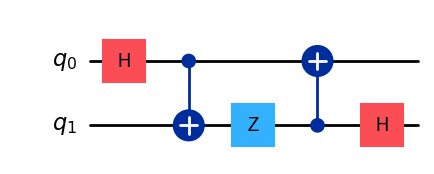

In [91]:
circuit = QuantumCircuit(2)
psi0 = Statevector.from_label("10")
circuit.h(0)
circuit.cx(0,1)
circuit.z(1)
circuit.cx(1,0)
circuit.h(1)

circuit.draw('mpl')

In [92]:
psif = psi0.evolve(circuit)
psif.draw('latex')

<IPython.core.display.Latex object>

## Compute the unitary matrix for a quantum circuit

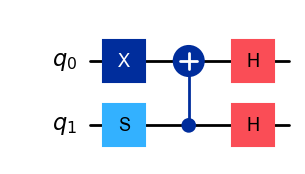

In [93]:
circuit = QuantumCircuit(2)
circuit.s(1)
circuit.x(0)
circuit.cx(1,0)
circuit.h(0)
circuit.h(1)

circuit.draw('mpl')

In [94]:
Operator(circuit).draw('latex')

<IPython.core.display.Latex object>

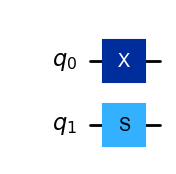

<IPython.core.display.Latex object>

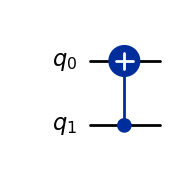

<IPython.core.display.Latex object>

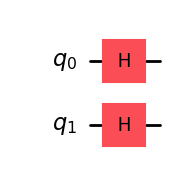

<IPython.core.display.Latex object>

In [95]:
# Show operator at each layer
dag = circuit_to_dag(circuit)
for layer in dag.layers():
    layer_as_circuit = dag_to_circuit(layer['graph'])
    display(layer_as_circuit.draw('mpl'))
    display(Operator(layer_as_circuit).draw('latex'))

## Compute a nonstandard basis measurement outcome

In [96]:
psi0 = (1/np.sqrt(3))* (Statevector.from_label("0")+ np.sqrt(2.0)*Statevector.from_label("1"))
psi1 = (1/np.sqrt(3))* (np.sqrt(2.0)*Statevector.from_label("0")+ -Statevector.from_label("1"))

phi = 1/np.sqrt(5.0)* Statevector.from_label("00") - np.sqrt(2.0/5.0)* Statevector.from_label("01") + np.sqrt(2.0/5.0)* Statevector.from_label("10") -1/np.sqrt(5.0)* Statevector.from_label("11")
phi.draw('latex')


<IPython.core.display.Latex object>

In [97]:
P0 = Operator(np.eye(2)).tensor(psi0.to_operator())
P0.draw('latex')

<IPython.core.display.Latex object>

In [98]:
# probability to get 
phif = phi.evolve(P0)
p0 = Fraction(np.real(phif.inner(phif))).limit_denominator()
print(f"Probabiliy to get the outcome 0: {p0}")

Probabiliy to get the outcome 0: 1/15
